#### Decision Tree on wheat data
* compare with K-neighbors, SVC (see lab6-assignment1)
* compare different max_depth values

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/Codes/Course_edX_PythonDataScience/Cached_Datasets/'
fname = flc + 'wheat.data'
X = pd.read_csv(fname, index_col = 0)

In [3]:
# remove rows with NaN
X = X.dropna(axis = 0)

In [4]:
# separate into labels and data & convert labels into numbers
y = X.wheat_type
labels = y.unique()
Y = y.map({labels[i]: i for i in range(len(labels))}) # for plotting purpose
X = X.drop(labels = 'wheat_type', axis = 1)

In [5]:
# split the datasets into training & testing data
# random_state = 7 to ensure repeatable results; skiped in real cases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [6]:
Niter = 5000 #200000 #

In [7]:
# classifier: decision tree
dtree = DecisionTreeClassifier(max_depth = 9, random_state = 2)
# run multiple times to test speed
t0 = time.time()
for i in range(Niter):
    dtree.fit(X_train, Y_train)
print(Niter, ' Training time (s): ', time.time() - t0)
t0 = time.time()
for i in range(Niter):
    dtree.predict(X_test)
print(Niter, ' Testing time (s): ', time.time() - t0)

5000  Training time (s):  2.2042737007141113
5000  Testing time (s):  0.2613546848297119


In [8]:
# test the influence of max_depth
for i in np.arange(10,0,-1):
    dtree = DecisionTreeClassifier(max_depth = i, random_state = 2)
    dtree.fit(X_train, Y_train)
    print('max_depth = ', i ,'; score: ', dtree.score(X_test, Y_test))

max_depth =  10 ; score:  0.918032786885
max_depth =  9 ; score:  0.918032786885
max_depth =  8 ; score:  0.918032786885
max_depth =  7 ; score:  0.918032786885
max_depth =  6 ; score:  0.918032786885
max_depth =  5 ; score:  0.918032786885
max_depth =  4 ; score:  0.885245901639
max_depth =  3 ; score:  0.885245901639
max_depth =  2 ; score:  0.852459016393
max_depth =  1 ; score:  0.688524590164


In [9]:
def plot2D(X_train, Y_train, X_test, Y_test, model):
    # multi-dimension -- contour for every two features
    colors0 = ['#ff0000', '#00ff00', '#0000ff'] #RGB
    colors = [colors0[i] for i in Y_train] # color-code the labels
    colormaps = matplotlib.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])

    Ncol = len(X_train.columns)

    plt.figure(figsize = (14,14))
    cnt = 0
    score0 = []
    for col in range(Ncol):
        for row in range(Ncol):
            plt.subplot(Ncol,Ncol,cnt+1)
            plt.xticks(())
            plt.yticks(())

            X_train_bag = X_train.iloc[:, [row, col]]
            X_test_bag = X_test.iloc[:, [row, col]]

            if col == row:
                plt.text(.5, .5, X_train.columns[row],
                         verticalalignment = 'center', horizontalalignment = 'center')
                cnt += 1
                continue
            # remove repeated plots
            if col > row: cnt += 1; continue

            # the range of the contour
            xmin, xmax = X_train_bag.iloc[:,0].min(), X_train_bag.iloc[:,0].max()
            ymin, ymax = X_train_bag.iloc[:,1].min(), X_train_bag.iloc[:,1].max()
            padding = 3
            xmin -= padding
            ymin -= padding
            xmax += padding
            ymax += padding

            # the grids of the contour
            resolution = 0.5
            xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                                 np.arange(ymin, ymax, resolution))
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            model.fit(X_train_bag, Y_train)
            zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
            zz = zz.reshape(xx.shape)

            # contour plot
            plt.contourf(xx, yy, zz, cmap = colormaps)

            # scatter plot
            plt.scatter(X_train_bag.iloc[:,0], X_train_bag.iloc[:,1], c = colors)

            # record the scores
            score0.append(model.score(X_test_bag, Y_test))

            cnt += 1
    plt.show()
    print('Max 2D score: ', max(score0))
    print('Min 2D score: ', min(score0))

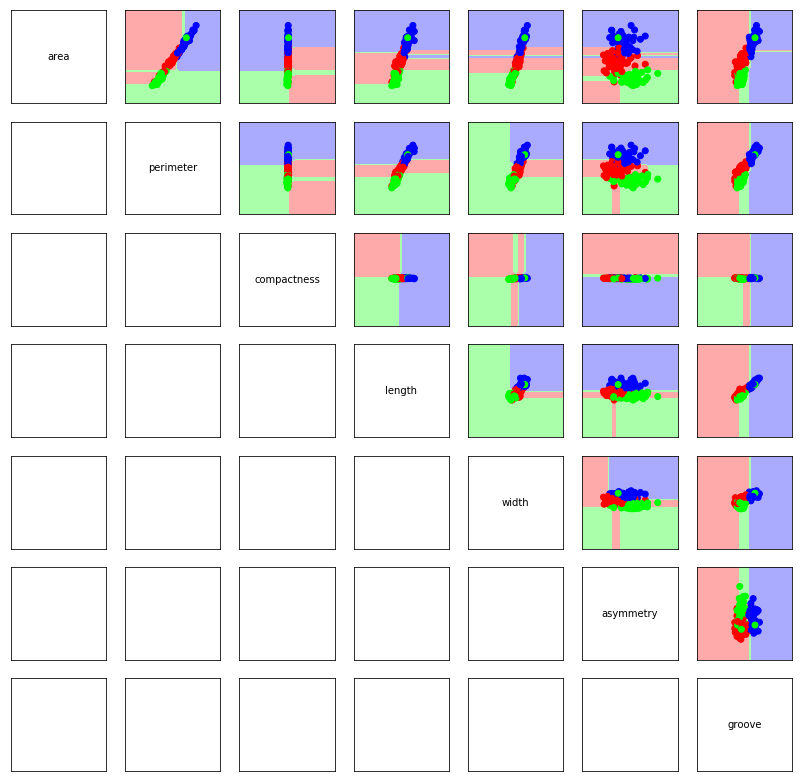

Max 2D score:  0.901639344262
Min 2D score:  0.491803278689


In [10]:
#low dimensional presentation of decision tree
dtree = DecisionTreeClassifier(max_depth = 9, random_state = 2)
plot2D(X_train, Y_train, X_test, Y_test, dtree)